## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [1]:
import pandas as pd
test = pd.read_csv('movie_review_test.csv')
test.head()

class                                               text
0   Pos   films adapted from comic books have had plent...
1   Pos   every now and then a movie comes along from a...
2   Pos   you ve got mail works alot better than it des...
3   Pos      jaws   is a rare film that grabs your atte...
4   Pos   moviemaking is a lot like being the general m...

In [2]:
train = pd.read_csv('movie_review_train.csv')
train.head()

class                                               text
0   Pos   a common complaint amongst film critics is   ...
1   Pos   whew   this film oozes energy   the kind of b...
2   Pos   steven spielberg s   amistad     which is bas...
3   Pos   he has spent his entire life in an awful litt...
4   Pos   being that it is a foreign language film with...

In [6]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
train['class'].value_counts()

Neg    800
Pos    800
Name: class, dtype: int64

In [24]:
test['class'].value_counts()

Neg    200
Pos    200
Name: class, dtype: int64

In [8]:
# mapping labels to 1 and 0
train['label'] = train['class'].map({'Neg':0, 'Pos':1})

In [25]:
test['label'] = test['class'].map({'Neg':0, 'Pos':1})

In [9]:
train.head()

class                                               text  label
0   Pos   a common complaint amongst film critics is   ...      1
1   Pos   whew   this film oozes energy   the kind of b...      1
2   Pos   steven spielberg s   amistad     which is bas...      1
3   Pos   he has spent his entire life in an awful litt...      1
4   Pos   being that it is a foreign language film with...      1

In [26]:
X_train=train.text
y_train=train.label
X_test=test.text
y_test=test.label

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600,)
(1600,)
(400,)
(400,)


In [12]:
# splitting into test and train
#from sklearn.model_selection  import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: text, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [33]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [41]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [42]:
len(vect.get_feature_names())

1643

In [37]:
len(vect.vocabulary_.keys())

35858

In [32]:
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [31]:
vect.get_feature_names()

['00',
 '000',
 '007',
 '00s',
 '03',
 '04',
 '05',
 '05425',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '10s',
 '10th',
 '11',
 '110',
 '113',
 '1138',
 '114',
 '115',
 '118',
 '11th',
 '12',
 '121',
 '122',
 '123',
 '127',
 '1272',
 '128',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '131',
 '132',
 '133',
 '135',
 '137',
 '139',
 '13th',
 '14',
 '140',
 '1400',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '153',
 '155',
 '1554',
 '157',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '1600s',
 '161',
 '165',
 '167',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '1700s',
 '1709',
 '172',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1865',
 '1869',
 '1871',
 '1885',
 '1888',
 '189',
 '1899',
 '18s',
 '18th',
 '19',
 '1900',
 '1903',
 '1908',
 '1912',
 '1913',
 '1914',
 '1916',
 '1919',
 '1920s'

In [43]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [55]:
X_test_tranformed.count_nonzero()

51663

In [56]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.79

In [58]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [59]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [21]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [22]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [23]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [24]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [25]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [26]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [27]:
print (roc_auc)

0.9967692858421334


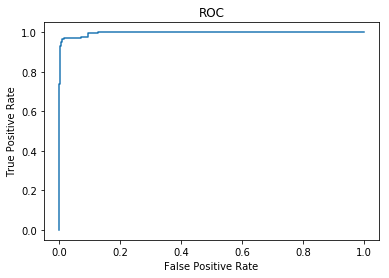

In [31]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)